**Dataset:**
MBTI type data

**Objective:**
classify Personality type as one of the following **using Logistic Regression, Random Forest and RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Accuracy, F1-score, Precision

#### What is MBTI?
- The MBTI(Myers-Briggs Type Indicator) is a widely used personality classification system that categorizes individuals into 16 personality types based on four psychological dimensions:

* Mind (Introversion (I) vs. Extraversion (E)) – How individuals interact with the world.
* Energy (Intuition (N) vs. Sensing (S)) – How individuals process information.
* Nature (Thinking (T) vs. Feeling (F)) – How individuals make decisions.
* Tactics (Judging (J) vs. Perceiving (P)) – How individuals approach life and structure.

- Each personality type is a combination of these four dimensions, such as INFJ, ENTP, or ISTP. MBTI is often used for self-awareness, career guidance, and team dynamics.

![MBTI Chart](picture-725919.png)

## 1. Import used libraries and load dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 1000)

In [46]:
df = pd.read_csv("mbti_1.csv")
df.head(10)

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

## 2. Data Exploring

### 2.1 Data Distribution

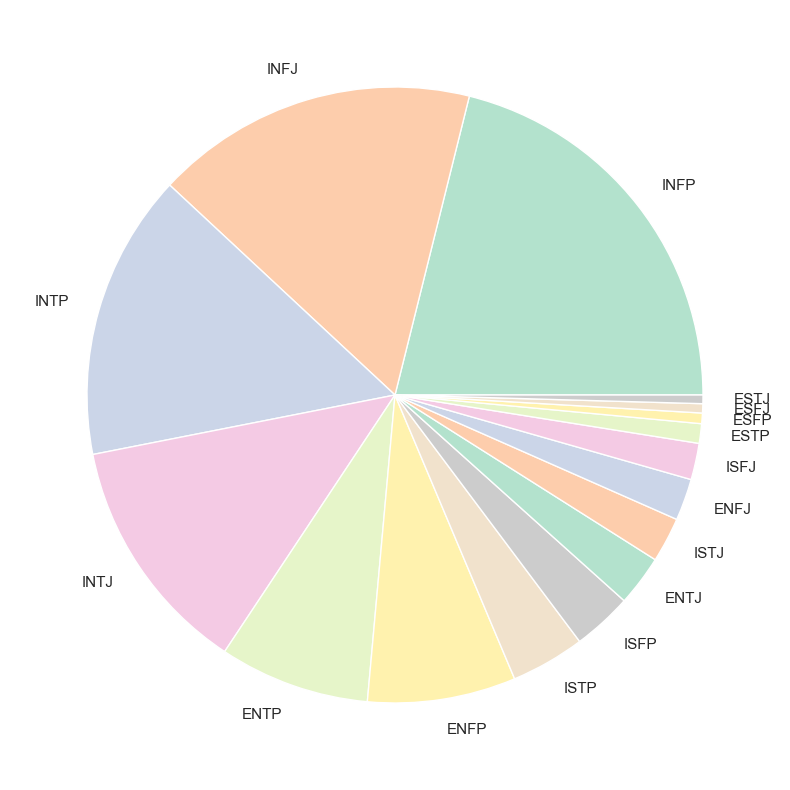

In [47]:
# Distribution by MBTI's

mbti_dict = df['type'].value_counts().to_dict()
mbti = list(mbti_dict.keys())
vals = list(mbti_dict.values())

#Plot
sns.set_theme()
fig, ax = plt.subplots(1,1,figsize = (10,10))
plt.pie(vals, labels = mbti, colors = plt.cm.Pastel2.colors)
plt.show()

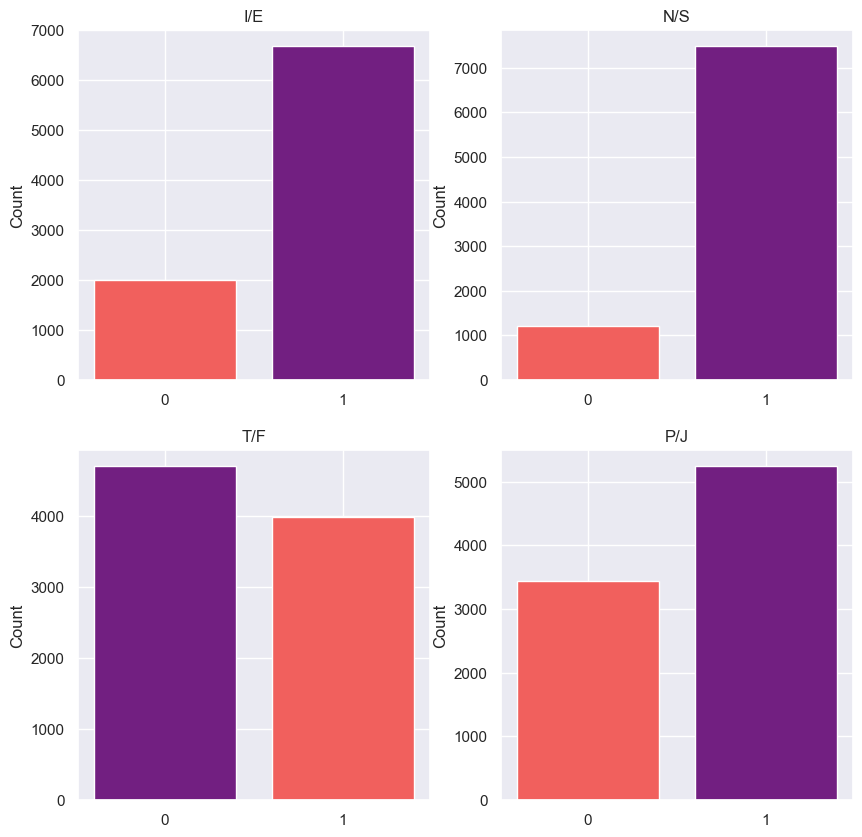

In [48]:
# Distribution by trait
df["I"] = 0
for i in range(df.shape[0]):
    if df.loc[i,"type"].find("I") != -1:
        df.loc[i,"I"] = 1
df["N"] = 0
for i in range(df.shape[0]):
    if df.loc[i,"type"].find("N") != -1:
        df.loc[i,"N"] = 1
df["T"] = 0
for i in range(df.shape[0]):
    if df.loc[i,"type"].find("T") != -1:
        df.loc[i,"T"] = 1
df["P"] = 0
for i in range(df.shape[0]):
    if df.loc[i,"type"].find("P") != -1:
        df.loc[i,"P"] = 1


fig, axs = plt.subplots(2, 2, figsize=(10, 10))  
colors = sns.color_palette("magma", n_colors=2) 
def bar_plot(colors, ax, title, col):
    ax.bar(x = df[col].value_counts().index,
           height=df[col].value_counts().values,
           color=colors,
           tick_label = df[col].value_counts().index)
    ax.set_title(title)
    ax.set_ylabel("Count")
bar_plot(colors, axs[0][0], "I/E", "I" )
bar_plot(colors, axs[0][1], "N/S", "N" )
bar_plot(colors, axs[1][0], "T/F", "T") 
bar_plot(colors, axs[1][1], "P/J", "P") 

#### Insights:
* INFP's, INFJ's, and INTP's and INTJ's make up the majority of our dataset out of ALL the 16
* There may be bias in our machine learning model towards intuition and introversion, may affecting the performance of the model

### 2.2 Data splitting

In [49]:
# Split the dataset into training set (80%) and a combined validation-test set (20%)
val_test_ratio = 0.2
X_train, X_val_test, y_train, y_val_test = train_test_split(df["posts"], df["type"], test_size=val_test_ratio, stratify=df["type"], random_state=42)

In [50]:
# Further split the validation-test set into validation (50%) and test (50%)
val_ratio = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=val_ratio, stratify=y_val_test, random_state=42)

In [51]:
print(len(df))
print(len(X_train))
print(len(X_val))
print(len(X_test))

8675
6940
867
868


### 2.3 EDA on training data

In [52]:
# check NaNs
X_train.isna().sum()

0

In [53]:
# check duplicates
X_train.duplicated().sum()

0

In [54]:
# Show sample of data texts to find out how to do the preprocessing steps
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

train.head(20)

,posts,type
0,"'this is actually exactly what i expected! :laughing: Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness! (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread: Name a famous person you don't like. mel gibson What was the last thing you bought? groceries to make italian food Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year... eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season. I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for s...",INFP
1,"'Nope. Not now, not ever. I'm too busy with work, causes, and adrenaline-rush activities, and I'll do anything to make sure no one can keep up. Freedom! Forever!|||63913|||I did some thinking today and I decided to arrive at this conclusion. I never really understood negative feelings in the past, so I tried to repress them hoping that they would go away and I would...|||How often do you guys find yourself miscommunicating with others, or using your own lingo when talking with others? I remember DJArendee's post a while back where he said speaking for him is like...|||20. I would cut up worms to see what would happen. The heck kind of question is that!?!?!|||I think chessboxing would be a totally awesome sport for an ISTP.|||I was doing a lumbar puncture in the clinic when the earthquake rock and roll began - I just let go of the needle (already in the patient) and was like okay.... while waiting it out - then I got...|||Boy to Man So I actually never really loved my mom s...",ISTP
2,"'Yes peace is the absence of conflict - your INFP friend suxx hardd An ideal peace would be where everybody does exactly what I say. Then they would be totally happy & relaxed & content. So,...|||I'm just going to reallybriefly respond: 1. Yes, when it's in a formalized way, where we both recognize that we're debating. I think it also really helps if it's with an Intuitive - could probably...|||Yeah, I can't say I like Nietzsche either. I think what I mean when I say assert your will on the external environment is basically have goals, & make them reality. Bend reality to your will. On...|||Yes, it's true that the person who gives more also garners favor - that is actually exactly in keeping with what I'm saying. Giving can be just as much of an attempt at garnering power & favor....|||First, I *totally* relate to every feeling you describe here, specifically in the post-break-up fall out. I'm just going to vomit out my thoughts on this subject & your predicament specifically: ...",ENFJ
3,"'I apologize for the delayed response, but thank you for taking the time to share your experiences. It's helpful to hear that good boundaries come with time and not instantly. :) I'm so sorry to...|||I think that is exactly what I needed to hear. Boundaries, neediness, etc. are exactly what I'm working on right now, as well as developing a healthy self-image. It's nice to know that having those...|||Thank you for your input. Dealing with rejection, confrontation, etc. are definitely things that I'm thinking about right now. The thing is, I recognize that people can be very negative. I was raised...|||For any of you INFP counselors, therapists, etc. - what challenges have you experienced in this field? I'm strongly considering counseling for a career, and would love input from fellow INFPs on your...|||Yes, I do think I've found the right type. A logical INFP, perhaps, but an INFP nevertheless. For now, anyway. :D Thanks! :hugs:|||Interesting. I got ENFP. Obviously 

### 2.4 Length of sentences

In [ ]:
# Computes the number of words in each post.
length = train['posts'].apply(lambda x: len(x.split()))
length.describe()

count    6940.000000
mean     1225.821037
std       310.615971
min         4.000000
25%      1046.000000
50%      1277.000000
75%      1457.000000
max      1849.000000
Name: posts, dtype: float64

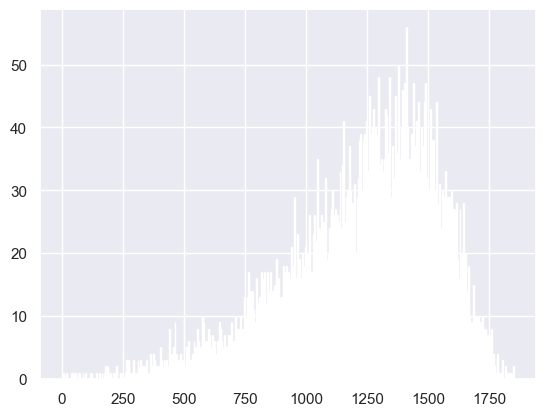

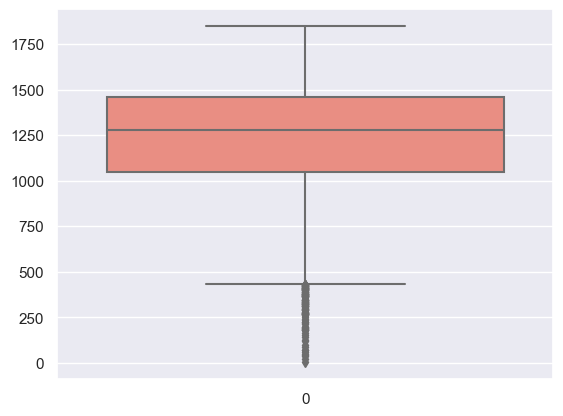

In [92]:
# Creates a histogram of sentence lengths to visualize the distribution.
# Creates a boxplot to show the spread and outliers in the sentence lengths.
 
plt.figure()
length.hist(bins=500)
plt.show()


plt.figure()
sns.boxplot(length, color='salmon')
plt.show()

In [57]:
# check dataset balancing
train["type"].value_counts()

# 'ES' type is much fewer than 'IN' type

INFP    1466
INFJ    1176
INTP    1043
INTJ     873
ENTP     548
ENFP     540
ISTP     270
ISFP     217
ENTJ     185
ISTJ     164
ENFJ     152
ISFJ     133
ESTP      71
ESFP      38
ESFJ      33
ESTJ      31
Name: type, dtype: int64

## 3. Data Cleaning 

#### There are 4 parts of data cleaning:
- Cleaning and Preprocessing
- Feature Engineering (From INFP to 'I', 'N', 'F', 'P')
- Tokenization
- Remove redundant words & Word cloud

### 3.1 Cleaning and Preprocessing

In [58]:
! pip install contractions
! pip install emoji

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


#### NLTK Common Issue and Solution!!

When using the `nltk` package, errors frequently occurred at the beginning!!! 

Later, I discovered that since September 2024, NLTK no longer allows downloading datasets online. Instead, the datasets must be manually downloaded from GitHub and stored locally.

To resolve this issue, the `nltk.data.path.append()` method must be used to specify the local path where the datasets are stored. Otherwise, a **LookupError** will occur, indicating that NLTK cannot find the required data files.


In [1]:
import nltk
#nltk.data.path.append('/Users/yetong/Desktop/nltk_data')
nltk.data.path.append('nltk_data')
import re
import emoji
import contractions
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [60]:
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')

In [61]:
stop_words = set(stopwords.words('english'))

def clean_txt(text):
    text = text.lower()  # Lower
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove Links
    text = re.sub(r':[a-z_]+:', '', text)  # Remove emojis
    text = re.sub(r'[^\w\s]', ' ', text)  # Keep only alphanumeric characters and spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\|\|+\s*\d+%\s*\|\|+', '', text)   # Remove redundant percentage and bar lines
    text = re.sub(r'\d+', '', text)   # Remove digits
    text = re.sub(r'\b\w\b', '', text)    # Remove any floating single char
    text = text.strip()   # Stripping
    words = word_tokenize(text)
    cleaned_words = [word for word in words if word.lower() not in stop_words]    # Remove stopwors
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

for i in range(10) :
    text = train['posts'].iloc[i]
    print(text)
    print('\n')
    clean_text = clean_txt(text)
    print(clean_text)
    print("_" * 120)

'this is actually exactly what i expected!  :laughing:  Introversion |||||||||| 40% |||||||||||||||| 70% Extroversion |||||||||||||||| 66% |||||||||| 36% Intuitive ||||||||||||||||||||...|||Now that you've had time to chill out, here comes the boundless insanity and awesomeness!  (p.s. just noticed the weird tense/perspective of this sentence... it's being spoken by the universe to me...|||I'm going to post before i actually read the entire thread:  Name a famous person you don't like. mel gibson  What was the last thing you bought? groceries to make italian food  Name a...|||i worked as a programmer all through high school, and then went to college for comp sci for about a year...  eventually i decided it was something that i enjoyed, but not something i wanted to do all...|||I buy it whenever possible, and i adjust my cooking habits to accommodate what's local and organic and in season.  I also cut corners in other parts of my budget so i don't have to sacrifice on the...|||for sure,

In [62]:
from sklearn.preprocessing import LabelEncoder

def clean_all_and_merge(train, val, test):
  train['clean_posts'] = train['posts'].apply(clean_txt)
  val['clean_posts'] = val['posts'].apply(clean_txt)
  test['clean_posts'] = test['posts'].apply(clean_txt)

  train.drop(columns=['posts'], inplace=True)
  val.drop(columns=['posts'], inplace=True)
  test.drop(columns=['posts'], inplace=True)

  return train, val, test

train, val, test = clean_all_and_merge(train, val, test)

In [63]:
train.head()

,type,clean_posts
0,INFP,actually exactly expected introversion extroversion intuitive time chill comes boundless insanity awesomeness noticed weird tense perspective sentence spoken universe going post actually read entire thread name famous person like mel gibson last thing bought groceries make italian food name worked programmer high school went college comp sci year eventually decided something enjoyed something wanted buy whenever possible adjust cooking habits accommodate local organic season also cut corners parts budget sacrifice sure epic fail average last years day better one came mm agree need compassion plenty justice justice means people acting superior wrongs would sufficed also think justice feeling love intense unreasonable know never able share even express much exactly typed explanation thought would elaborate nearly identical wrote girl falling coming tonite cook dinner think feels absolutely delighted terrified mostly delighted though sort thing happens good intentioned people take wri...
1,ISTP,nope ever busy work causes adrenaline rush activities anything make sure one keep freedom forever thinking today decided arrive conclusion never really understood negative feelings past tried repress hoping would go away would often guys find miscommunicating others using lingo talking others remember djarendee post back said speaking like would cut worms see would happen heck kind question think chessboxing would totally awesome sport istp lumbar puncture clinic earthquake rock roll began let go needle already patient like okay waiting got boy man actually never really loved mom speak workaholic worked dad office assistant also nurse taking lot shifts like saying love poor delivery gravelly voice help mean seriously pick one ladies want jack bauer usher saying love hay baybay yo fanta say like dancing playing guitar like art museums interact art hands staring away making weird comments style see hell unwanted center attention justin bieber lady gaga wannabe place bets general ques...
2,ENFJ,yes peace absence conflict infp friend suxx hardd ideal peace would everybody exactly say would totally happy relaxed content going reallybriefly respond yes formalized way recognize debating think also really helps intuitive could probably yeah say like nietzsche either think mean say assert external environment basically goals make reality bend reality yes true person gives also garners favor actually exactly keeping saying giving much attempt garnering power favor first totally relate every feeling describe specifically post break fall going vomit thoughts subject predicament specifically know enfj estp relationships look like healthy talking romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow go town motown bloat clown walking street aquiesence mmm give quick response maybe go depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty much every job months feel good fit lol...
3,INFP,apologize delayed response thank taking time share experiences helpful hear good boundaries come time instantly sorry think exactly needed hear boundaries neediness etc exactly working right well developing healthy self image nice know thank input dealing rejection confrontation etc definitely things thinking right thing recognize people negative raised infp counselors therapists etc challenges experienced field strongly considering counseling career would love input fellow infps yes think found right type logical infp perhaps infp nevertheless anyway thanks interesting got enfp obviously depends individual person could see interested infj yep sigh inbox full hmm yeah would frustrate wonder reframing would help looking new challenge something something worth time effort sorry feel boat many times hunt good job fits personality well mind ask industry gosh struggle right actually thinking blog post need write apparently much rather often foun

### 3.2 Feature Engineering on Labels

#### Four Characters [1] [2] [3] [4]

#### [1] `Mind` : Extrovert {E} - Introvert {I}

#### [2] `Energy` : Intuitive {N} - Sensing {S}

#### [3] `Nature` : Thinking {T} - Feeling {F}

#### [4] `Tactics` : Judging {J} - Perceiving {P}

In [64]:
def personality(df):
  df['Mind'] = df['type'].map(lambda x: 'Extroverted'
                                    if x[0] == 'E' else 'Introverted')
  df['Energy'] = df['type'].map(lambda x: 'Intuitive'
                                      if x[1] == 'N' else 'Sensing')
  df['Nature'] = df['type'].map(lambda x: 'Thinking'
                                      if x[2] == 'T' else 'Feeling')
  df['Tactics'] = df['type'].map(lambda x: 'Judging'
                                      if x[3] == 'J' else 'Perceiving')

  df['E'] = df['type'].apply(lambda x: x[0] == 'I').astype('float')
  df['N'] = df['type'].apply(lambda x: x[1] == 'N').astype('float')
  df['T'] = df['type'].apply(lambda x: x[2] == 'F').astype('float')
  df['J'] = df['type'].apply(lambda x: x[3] == 'P').astype('float')


personality(train)
personality(val)
personality(test)

In [65]:
train.head()

,type,clean_posts,Mind,Energy,Nature,Tactics,E,N,T,J
0,INFP,actually exactly expected introversion extroversion intuitive time chill comes boundless insanity awesomeness noticed weird tense perspective sentence spoken universe going post actually read entire thread name famous person like mel gibson last thing bought groceries make italian food name worked programmer high school went college comp sci year eventually decided something enjoyed something wanted buy whenever possible adjust cooking habits accommodate local organic season also cut corners parts budget sacrifice sure epic fail average last years day better one came mm agree need compassion plenty justice justice means people acting superior wrongs would sufficed also think justice feeling love intense unreasonable know never able share even express much exactly typed explanation thought would elaborate nearly identical wrote girl falling coming tonite cook dinner think feels absolutely delighted terrified mostly delighted though sort thing happens good intentioned people take wri...,Introverted,Intuitive,Feeling,Perceiving,1.0,1.0,1.0,1.0
1,ISTP,nope ever busy work causes adrenaline rush activities anything make sure one keep freedom forever thinking today decided arrive conclusion never really understood negative feelings past tried repress hoping would go away would often guys find miscommunicating others using lingo talking others remember djarendee post back said speaking like would cut worms see would happen heck kind question think chessboxing would totally awesome sport istp lumbar puncture clinic earthquake rock roll began let go needle already patient like okay waiting got boy man actually never really loved mom speak workaholic worked dad office assistant also nurse taking lot shifts like saying love poor delivery gravelly voice help mean seriously pick one ladies want jack bauer usher saying love hay baybay yo fanta say like dancing playing guitar like art museums interact art hands staring away making weird comments style see hell unwanted center attention justin bieber lady gaga wannabe place bets general ques...,Introverted,Sensing,Thinking,Perceiving,1.0,0.0,0.0,1.0
2,ENFJ,yes peace absence conflict infp friend suxx hardd ideal peace would everybody exactly say would totally happy relaxed content going reallybriefly respond yes formalized way recognize debating think also really helps intuitive could probably yeah say like nietzsche either think mean say assert external environment basically goals make reality bend reality yes true person gives also garners favor actually exactly keeping saying giving much attempt garnering power favor first totally relate every feeling describe specifically post break fall going vomit thoughts subject predicament specifically know enfj estp relationships look like healthy talking romantic relationships brief thoughts estps keep brief chance conclude make preponderance evidence astral low show slow go town motown bloat clown walking street aquiesence mmm give quick response maybe go depth later largely flux stuff bad evil big jerk big ego necessarily trump enfj tmlt quit pretty much every job months feel good fit lol...,Extroverted,Intuitive,Feeling,Judging,0.0,1.0,1.0,0.0
3,INFP,apologize delayed response thank taking time share experiences helpful hear good boundaries come time instantly sorry think exactly needed hear boundaries neediness etc exactly working right well developing healthy self image nice know thank input dealing rejection confrontation etc definitely things thinking right thing recognize people negative raised infp counselors therapists etc challenges experienced field strongly considering counseling career would love input fellow infps yes think found right type logical infp perhaps infp nevertheless anyway thanks interesting got enfp obviously depends individual person could see interested infj yep sigh inbox full hmm yeah would frustrate wonder reframing would help looking new challenge something

### 3.3 Tokenization

In [ ]:
# Tokenizes and converts text data into numerical sequences.


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 900
word2idx = tf.keras.datasets.imdb.get_word_index()

tokenizer = Tokenizer(num_words=max_seq_len)
tokenizer.fit_on_texts(train['clean_posts'])
word_to_idx = tokenizer.word_index

# Pads sequences to ensure equal length.

train_sequences = tokenizer.texts_to_sequences(train['clean_posts'])
val_sequences = tokenizer.texts_to_sequences(val['clean_posts'])
test_sequences = tokenizer.texts_to_sequences(test['clean_posts'])

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_seq_len)
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_seq_len)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_seq_len)

### 3.4 Remove some words & Word cloud

#### From the data we can see irrelevant and redundant words, in this part we will remove them and show the most frequent words in each mbti's category

In [67]:
words_to_remove = {"like", "think", "people", "one", "would", "really", "well", "something", "always", "thing", "good", "feel", "actually", "never", "also", "go", "way", "see", "type", "much", "say", "get", "want", "lot", "time", "know"}

In [68]:
def remove_words(text, words_to_remove):
    return ' '.join([word for word in text.split() if word.lower() not in words_to_remove])

train['clean_posts'] = train['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))

top_words_per_class = {}

classes = train['type'].unique()

for class_label in classes:
    class_data = train[train['type'] == class_label]['clean_posts']
    
    tokenizer = Tokenizer()
    
    tokenizer.fit_on_texts(class_data)
    
    word_to_idx = tokenizer.word_index
    word_counts = tokenizer.word_counts
    
    for word in words_to_remove:
        if word in word_to_idx:
            word_to_idx[word] = 0
    
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_50_words = [(word, count) for word, count in sorted_word_counts if word not in words_to_remove][:50]
    
    top_words_per_class[class_label] = top_50_words


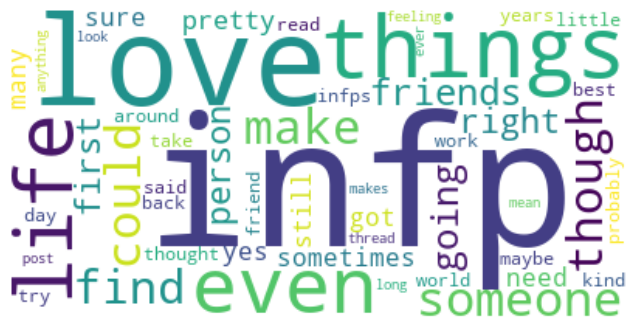

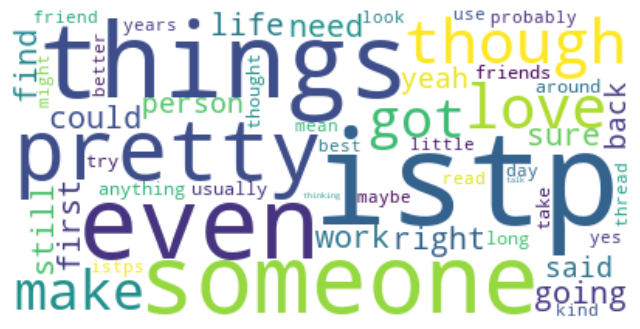

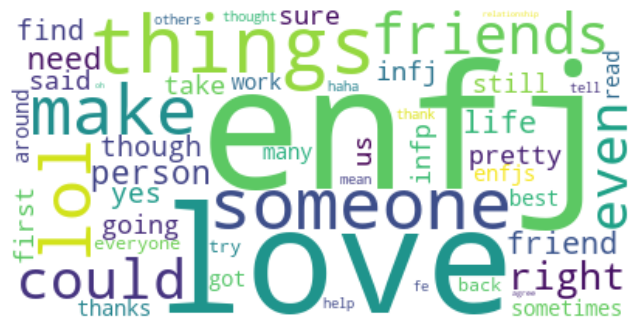

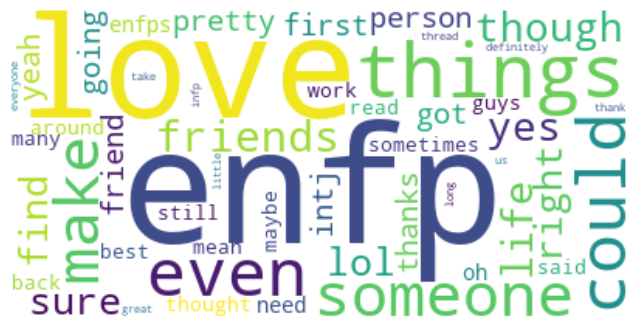

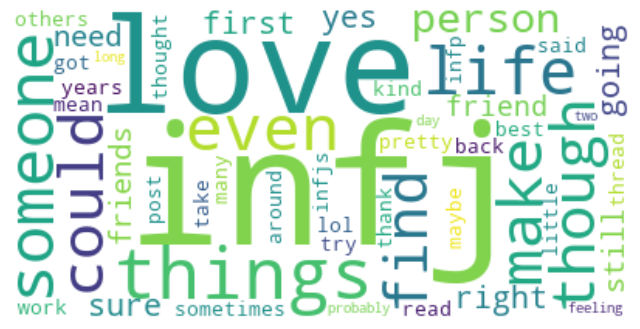

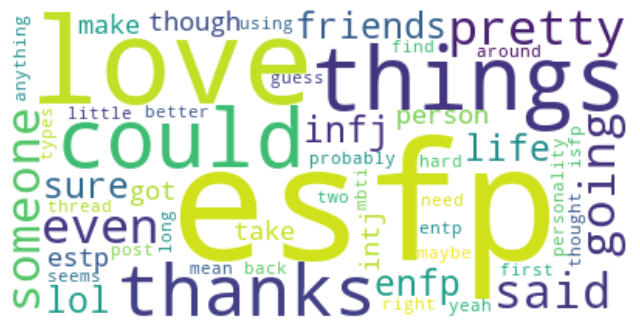

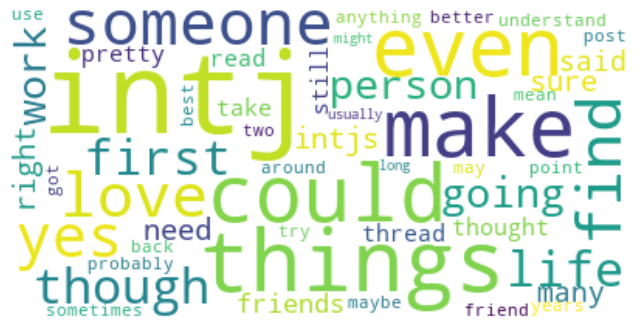

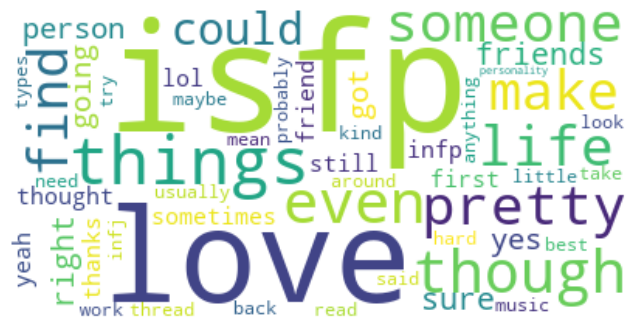

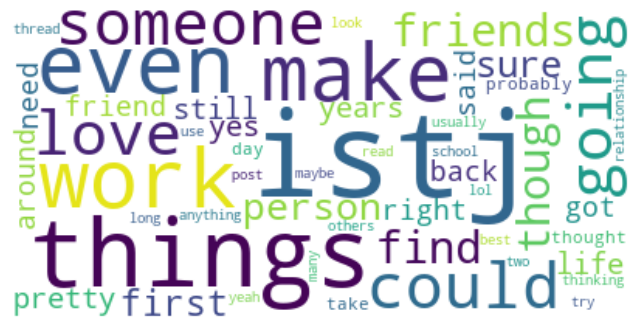

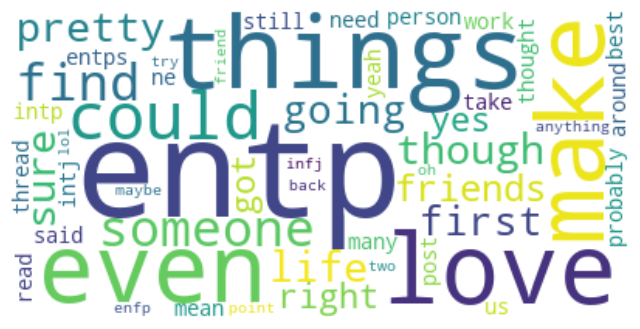

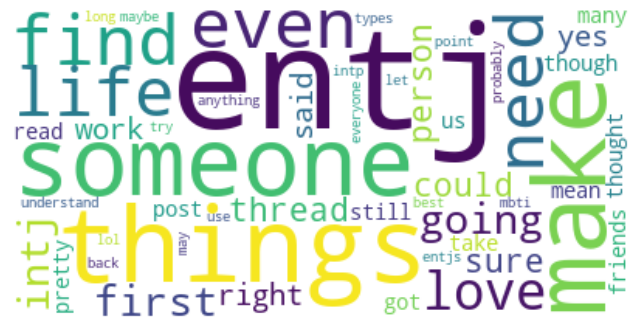

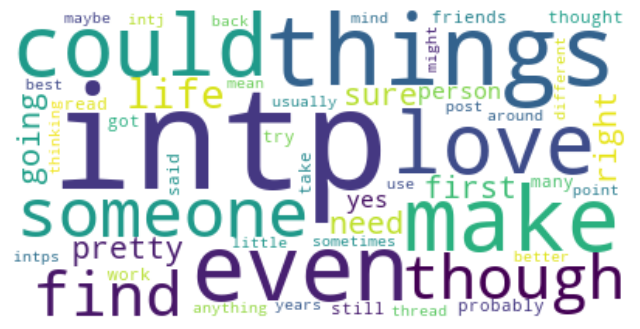

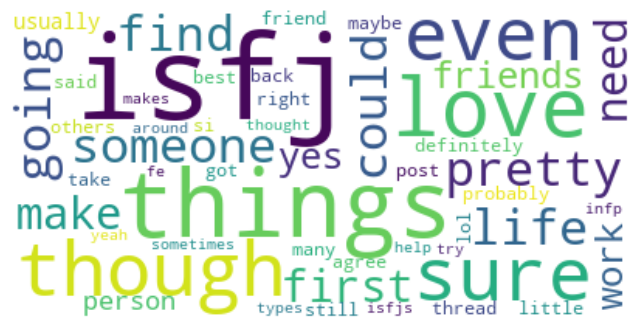

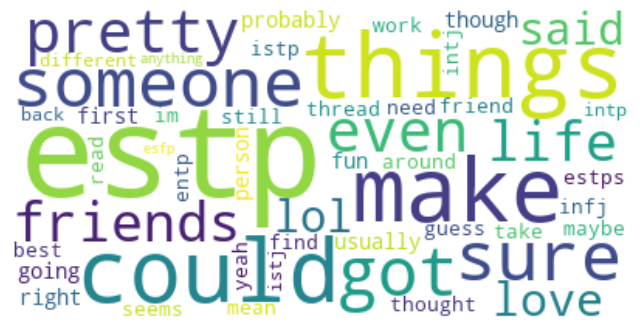

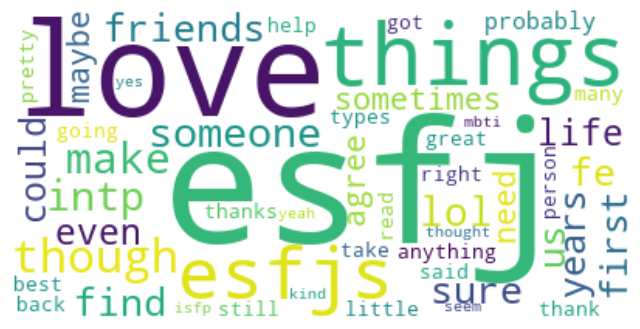

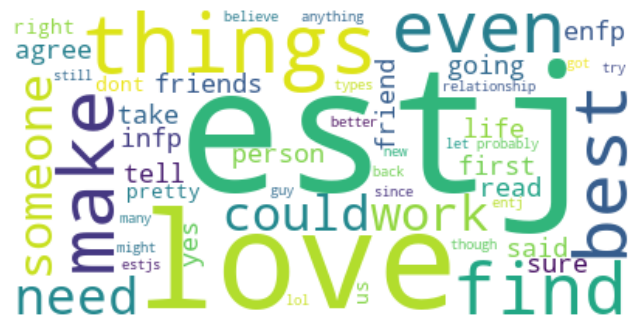

In [69]:
from wordcloud import WordCloud

def word_cloud(mbti):
    if mbti in top_words_per_class:
        word_freq = dict(top_words_per_class[mbti])  # Convert the top words list to a dictionary
        
        wordcloud = WordCloud(max_words=250, background_color="white").generate_from_frequencies(word_freq)

        # Plot
        plt.figure(figsize=(8, 8))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")  # Hide axis
        plt.xlabel(mbti, fontsize=14)
        plt.show()
    else:
        print(f"No data available for MBTI type: {mbti}")

# Show each mbti's wordcloud
for mbti_type in top_words_per_class.keys():
    word_cloud(mbti_type)

In [70]:
# Continue clean the data
val['clean_posts'] = val['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))
test['clean_posts'] = test['clean_posts'].apply(lambda x: remove_words(x, words_to_remove))

## 4. Models

#### 

### 4.1 Logistic Regression

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Extract the cleaned text data from each dataset
X_train_text = train['clean_posts']
X_val_text = val['clean_posts']
X_test_text = test['clean_posts']

# Extract target labels (MBTI types)
y_train_labels = train['type']
y_val_labels = val['type']
y_test_labels = test['type']

# Encode the MBTI type labels as numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_labels)
y_val = label_encoder.transform(y_val_labels)
y_test = label_encoder.transform(y_test_labels)


In [ ]:
# Uses TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf = vectorizer.transform(X_val_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# trains a logistic regression model for classification.
logistic_model = LogisticRegression(max_iter=500, solver="saga", class_weight="balanced")
logistic_model.fit(X_train_tfidf, y_train)

/Users/yetong/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500, solver='saga')

In [ ]:
# Predicting
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# evaluate accuracy
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")

# Classification report
print(classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.6406
              precision    recall  f1-score   support

        ENFJ       0.47      0.74      0.57        19
        ENFP       0.55      0.60      0.58        68
        ENTJ       0.59      0.43      0.50        23
        ENTP       0.65      0.48      0.55        69
        ESFJ       0.12      0.25      0.17         4
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         4
        ESTP       0.50      0.89      0.64         9
        INFJ       0.85      0.59      0.69       147
        INFP       0.77      0.65      0.71       183
        INTJ       0.64      0.74      0.69       109
        INTP       0.60      0.82      0.70       131
        ISFJ       0.60      0.38      0.46        16
        ISFP       0.54      0.52      0.53        27
        ISTJ       0.52      0.60      0.56        20
        ISTP       0.50      0.68      0.58        34

    accuracy                           0.64

/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model Evaluation Results:

- **Accuracy: 0.6406**
- **weighted avg F1-score: 0.64**
<br>
<br>
- Performs well on **high-frequency classes** like INFJ (0.85 precision, 0.69 F1-score), INFP (0.77 precision, 0.71 F1-score), and INTP (0.60 precision, 0.70 F1-score).
- Better recall on some minority classes (ENFJ recall: 0.74, ESTP recall: 0.89). (compared to random forest)

### 4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_model.fit(X_train_tfidf, y_train)


y_pred_rf = rf_model.predict(X_test_tfidf)


rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")


print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.6083
              precision    recall  f1-score   support

        ENFJ       0.67      0.11      0.18        19
        ENFP       0.70      0.57      0.63        68
        ENTJ       0.89      0.35      0.50        23
        ENTP       0.57      0.48      0.52        69
        ESFJ       0.00      0.00      0.00         4
        ESFP       0.00      0.00      0.00         5
        ESTJ       0.00      0.00      0.00         4
        ESTP       1.00      0.11      0.20         9
        INFJ       0.62      0.63      0.63       147
        INFP       0.50      0.84      0.62       183
        INTJ       0.72      0.57      0.64       109
        INTP       0.67      0.75      0.71       131
        ISFJ       0.78      0.44      0.56        16
        ISFP       0.75      0.22      0.34        27
        ISTJ       0.75      0.30      0.43        20
        ISTP       0.83      0.56      0.67        34

    accuracy                           0.61      

/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yetong/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model Evaluation Results:

- **Accuracy: 0.6083**
- **weighted avg F1-score: 0.59**
<br>
<br>
- Slightly better performance on ENTJ (0.89 precision vs. 0.59 in Logistic Regression).

### 4.3 RNNs (Using simple RNN, GRU cells)-(Tried LSTM but not that good)

In [71]:
max_seq_len = 820
train_padded_sequences = pad_sequences(train_padded_sequences, maxlen=max_seq_len)
val_padded_sequences = pad_sequences(val_padded_sequences, maxlen=max_seq_len)
test_padded_sequences = pad_sequences(test_padded_sequences, maxlen=max_seq_len)

train_padded_sequences[0].shape

(820,)

* Ensures that all input sequences have the same length (820 tokens).
* Prints the shape of a single padded sequence to verify the preprocessing.

In [ ]:
# Extract binary personality trait labels (E/I, N/S, T/F, J/P)
y_train = train[['E', 'N', 'T', 'J']]
y_val = val[['E', 'N', 'T', 'J']]
y_test = test[['E', 'N', 'T', 'J']]

print(y_val.shape)
print(y_train.shape)

(867, 4)
(6940, 4)


* Selects personality trait columns (E, N, T, J) as target labels for training, validation, and testing.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Custom metric to track binary cross-entropy loss during training
class LossMetric(tf.keras.metrics.Metric):
    def __init__(self, name='loss', **kwargs):
        super(LossMetric, self).__init__(name=name, **kwargs)
        self.loss_tracker = self.add_weight(name='loss', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        self.loss_tracker.assign(tf.reduce_mean(loss))

    def result(self):
        return self.loss_tracker

    def reset_states(self):
        self.loss_tracker.assign(0.0)


In [ ]:
# Define class weights to address class imbalance

class_weights = tf.constant([20.0, 30.0, 10.0, 10.0], dtype=tf.float32)

def weighted_binary_crossentropy(y_true, y_pred):
    # Calculate the binary cross-entropy loss for each class
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    # Expand class weights to match the shape of y_true/y_pred
    weights = tf.reduce_sum(class_weights * y_true, axis=-1)
    
    # Apply the weights
    weighted_bce = bce * weights[:, None]
    return tf.reduce_mean(weighted_bce, axis=-1)

* Defines a custom loss function that applies class-specific weights to balance the training process.


##### SimpleRNN cell

In [ ]:
# Define vocabulary size and number of output classes
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]

# a simple RNN-based model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model
model1.compile(
    loss=weighted_binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [ ]:
# Train the model
history1 = model1.fit(train_padded_sequences, y_train, epochs=10, batch_size=256,
                    validation_data=(val_padded_sequences, y_val),
                    validation_steps=1)

Epoch 1/10
 1/28 [>.............................] - ETA: 3s - loss: 0.3567 - categorical_accuracy: 0.1953 - precision_3: 0.8340

/Users/yetong/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


28/28 [==============================] - 3s 102ms/step - loss: 0.3460 - categorical_accuracy: 0.1794 - precision_3: 0.8478 - val_loss: 0.7622 - val_categorical_accuracy: 0.2266 - val_precision_3: 0.7383
Epoch 2/10
 1/28 [>.............................] - ETA: 2s - loss: 0.3159 - categorical_accuracy: 0.1953 - precision_3: 0.8799

/Users/yetong/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


28/28 [==============================] - 3s 103ms/step - loss: 0.3853 - categorical_accuracy: 0.1745 - precision_3: 0.8622 - val_loss: 0.7675 - val_categorical_accuracy: 0.1992 - val_precision_3: 0.7402
Epoch 3/10
28/28 [==============================] - 3s 98ms/step - loss: 0.3059 - categorical_accuracy: 0.1676 - precision_3: 0.8736 - val_loss: 0.8177 - val_categorical_accuracy: 0.2266 - val_precision_3: 0.7385
Epoch 4/10
28/28 [==============================] - 3s 97ms/step - loss: 0.3453 - categorical_accuracy: 0.1640 - precision_3: 0.8853 - val_loss: 0.9050 - val_categorical_accuracy: 0.2188 - val_precision_3: 0.7387
Epoch 5/10
28/28 [==============================] - 3s 97ms/step - loss: 0.2332 - categorical_accuracy: 0.1676 - precision_3: 0.8965 - val_loss: 1.0000 - val_categorical_accuracy: 0.2188 - val_precision_3: 0.7249
Epoch 6/10
28/28 [==============================] - 3s 116ms/step - loss: 0.3162 - categorical_accuracy: 0.1782 - precision_3: 0.8943 - val_loss: 0.9569 - val

In [77]:
y_train.head(10)

,E,N,T,J
0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,0.0,0.0,1.0,1.0


In [ ]:
results = model1.evaluate(test_padded_sequences, y_test)
# Print the evaluation metrics
print(results)  


19/28 [===================>..........] - ETA: 0s - loss: 1.5168 - categorical_accuracy: 0.2303 - precision_3: 0.7410

/Users/yetong/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


28/28 [==============================] - 0s 9ms/step - loss: 1.6341 - categorical_accuracy: 0.2339 - precision_3: 0.7458
[1.6340646743774414, 0.2338709682226181, 0.7458124160766602, 1.6340646743774414]


#### Model Evaluation Results:

- **categorical_accuracy: 0.2339**: Final accuracy of 23.39% 
- **precision_3: 0.7458**: Precision is 74.58%, meaning when the model predicts a positive label, it is correct 74.58% of the time.

##### GRU-based neural network

#### Changes compared to Simple RNN
- Increased Embedding Size (64 vs. 32): More features per word allow the model to learn better word representations.
- More Dense Layers with ReLU Activation: Allows the model to learn complex relationships between words and personality types.

In [ ]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes = y_train.shape[1]

# a GRU-based neural network model
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model3.compile(
    loss=weighted_binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        LossMetric(),
    ]
)


In [80]:
history3 = model3.fit(train_padded_sequences, y_train, epochs=10, batch_size=128,
                    validation_data=(val_padded_sequences, y_val),
                    validation_steps=1)

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 0.5577 - categorical_accuracy: 0.2039 - precision_4: 0.7056

/Users/yetong/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


55/55 [==============================] - 176s 3s/step - loss: 0.5577 - categorical_accuracy: 0.2039 - precision_4: 0.7056 - val_loss: 0.5908 - val_categorical_accuracy: 0.2031 - val_precision_4: 0.6836
Epoch 2/10
55/55 [==============================] - 170s 3s/step - loss: 0.5818 - categorical_accuracy: 0.2053 - precision_4: 0.6943 - val_loss: 0.5941 - val_categorical_accuracy: 0.2031 - val_precision_4: 0.6830
Epoch 3/10
55/55 [==============================] - 96s 2s/step - loss: 0.5288 - categorical_accuracy: 0.2053 - precision_4: 0.6959 - val_loss: 0.5979 - val_categorical_accuracy: 0.2031 - val_precision_4: 0.6873
Epoch 4/10
55/55 [==============================] - 45s 813ms/step - loss: 0.4956 - categorical_accuracy: 0.2055 - precision_4: 0.7070 - val_loss: 0.5904 - val_categorical_accuracy: 0.2031 - val_precision_4: 0.7080
Epoch 5/10
55/55 [==============================] - 44s 797ms/step - loss: 0.5323 - categorical_accuracy: 0.2205 - precision_4: 0.7342 - val_loss: 0.6000 - va

In [81]:
y_test.head(10)

,E,N,T,J
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0
5,0.0,1.0,1.0,1.0
6,0.0,1.0,1.0,1.0
7,1.0,1.0,0.0,1.0
8,1.0,0.0,1.0,1.0
9,1.0,1.0,0.0,1.0


In [ ]:
results = model3.evaluate(test_padded_sequences, y_test)
print(results)  


 2/28 [=>............................] - ETA: 1s - loss: 0.5643 - categorical_accuracy: 0.7031 - precision_4: 0.7708

/Users/yetong/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric LossMetric implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


28/28 [==============================] - 2s 77ms/step - loss: 0.5890 - categorical_accuracy: 0.6486 - precision_4: 0.7974
[0.5889980792999268, 0.6486175060272217, 0.7974388599395752, 0.5889980792999268]


#### Model Evaluation Results:
- **Categorical Accuracy: 64.86%:** 
This is much higher than the SimpleRNN model (23.39%). Shows the GRU model is better at classifying personality traits.

- **Precision: 79.74%:**
Higher precision means that when the model predicts a class, it is correct 79.74% of the time.
Better than the previous model (~74%).

### 4.4 Predict the MBTI

In [96]:
def predict_mbti_logistic(text, vectorizer, model, label_encoder):
    text_tfidf = vectorizer.transform([text])  # Preprocess the input text and vectorization using TF-IDF
    prediction = model.predict(text_tfidf)  # Predict by Logistic Regression
    predicted_mbti = label_encoder.inverse_transform(prediction)[0]  # Return the predicted MBTI type
    return predicted_mbti



default_text = "This project is so challenging, but I still survived! I love deep intellectual conversations and analyzing abstract ideas."


user_text = input(f"Enter a text to predict MBTI (or press Enter to use default): ").strip()
if not user_text:  
    user_text = default_text
    print(f"Using default text: {user_text}\n")

predicted_mbti = predict_mbti_logistic(user_text, vectorizer, logistic_model, label_encoder)
print(f"Predicted MBTI Type: {predicted_mbti}")




Using default text: This project is so challenging, but I still survived! I love deep intellectual conversations and analyzing abstract ideas.

Predicted MBTI Type: INTP


## 5. Conclusion

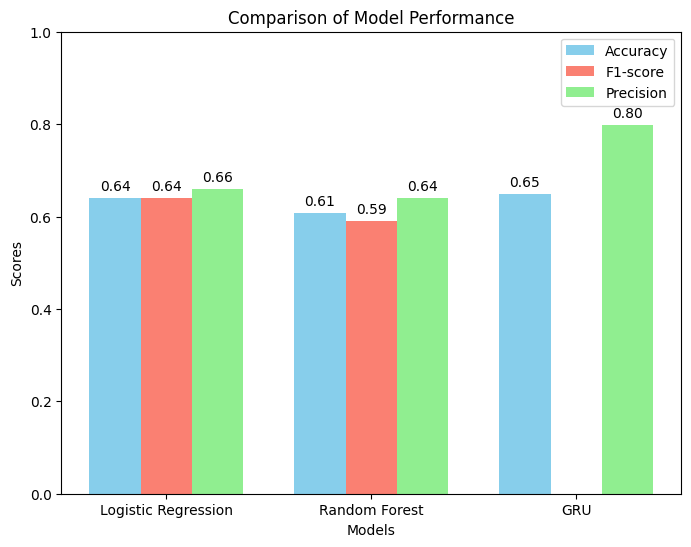

In [2]:
# Re-import necessary libraries since the execution state was reset
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Random Forest", "GRU"]

# Metrics values
accuracy = [0.6406, 0.6083, 0.6486]  # Using categorical accuracy for GRU
f1_score = [0.64, 0.59, None]  # GRU does not have an F1-score in the table
precision = [0.66, 0.64, 0.7974]

# Set bar width
bar_width = 0.25

# X locations for groups
x = np.arange(len(models))

# Create bar plots
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width, accuracy, bar_width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x, [v if v is not None else 0 for v in f1_score], bar_width, label="F1-score", color="salmon")
bars3 = ax.bar(x + bar_width, precision, bar_width, label="Precision", color="lightgreen")

# Labels and formatting
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display value labels
for bars, values in zip([bars1, bars2, bars3], [accuracy, f1_score, precision]):
    for bar, value in zip(bars, values):
        if value is not None:  # Avoid displaying None values
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.2f}',
                    ha='center', va='bottom', fontsize=10)

# Show plot
plt.ylim(0, 1)
plt.show()


#### 1. GRU is the best model overall
- Achieves the highest accuracy (64.86%).
- Balances precision and recall better than other models.
- Learns text features more effectively due to long-term memory capabilities.

#### 2. Logistic Regression is the best non-deep-learning model
- It performs nearly as well as GRU (64.06% accuracy) while being computationally efficient.
- Works well when training data is limited.

#### Future improvements:
- 1. A key limitation of the current model is **data imbalance**, where certain MBTI types (e.g., INFP, INFJ, INTP) have significantly more samples than others (e.g., ISTJ, ESTJ, ESFP). This imbalance leads to higher prediction accuracy for frequent personality types but very low accuracy for rare types, ultimately reducing overall model performance.

- For this limitation, in the future I can: <br>
* Use a larger and more balanced **dataset**
* Apply oversampling techniques like **SMOTE and data augmentation** to handle class imbalance

- 2. Use more advanced models like Transformer-based architectures like BERT and RoBERTa
